<a href="https://colab.research.google.com/github/Iamthulasiraman/Detecting-Blad-or-Not/blob/main/Detecting_Blad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***importing dataset***

In [ ]:
!pip install -q opendatasets

import opendatasets as od
import pandas as pd

od.download('https://www.kaggle.com/datasets/ashishjangra27/bald-classification-200k-images-celeba')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: iamthulasiraman
Your Kaggle Key: ··········


100%|██████████| 1.32G/1.32G [00:15<00:00, 91.9MB/s]


In [ ]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt


### **Train Data**

In [ ]:
path_b = "/content/bald-classification-200k-images-celeba/Dataset/Train/Bald"
files = os.listdir(path_b)

path_n = "/content/bald-classification-200k-images-celeba/Dataset/Train/NotBald"
files_n = os.listdir(path_n)

In [ ]:
imge_b   = []
data_b   = []
for i in tqdm(files):
    tot = path_b +'/'+i
    image = cv2.imread(tot)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (96,96))
    imge_b.append(np.array(image))
    data_b.append(1)

imge_n   = []
data_n   = []
for i in tqdm(files_n[:6000]):
    tot = path_n +'/'+i
    image = cv2.imread(tot)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (96,96))
    imge_n.append(np.array(image))
    data_n.append(0)

100%|██████████| 6000/6000 [00:03<00:00, 1826.01it/s]


In [ ]:
imge = imge_b + imge_n

In [ ]:
data_t = data_b + data_n

In [ ]:
len(imge)

9656

array([[[204, 202, 216],
        [203, 202, 216],
        [194, 196, 209],
        ...,
        [217, 137, 114],
        [222, 134, 117],
        [218, 137, 116]],

       [[204, 202, 216],
        [203, 202, 216],
        [194, 196, 209],
        ...,
        [217, 137, 114],
        [222, 134, 118],
        [218, 137, 116]],

       [[204, 202, 216],
        [203, 202, 216],
        [194, 196, 209],
        ...,
        [217, 137, 114],
        [222, 134, 118],
        [218, 137, 116]],

       ...,

       [[ 24,  24,  24],
        [ 24,  24,  24],
        [ 24,  24,  24],
        ...,
        [ 26,  26,  24],
        [ 26,  26,  24],
        [ 26,  26,  24]],

       [[ 25,  25,  25],
        [ 23,  23,  23],
        [ 23,  23,  23],
        ...,
        [ 26,  26,  24],
        [ 26,  26,  24],
        [ 26,  26,  24]],

       [[ 23,  23,  23],
        [ 22,  22,  22],
        [ 22,  22,  22],
        ...,
        [ 24,  24,  22],
        [ 24,  24,  22],
        [ 24,  24,  22]]], dtype=uint8)
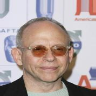

In [ ]:
imge[2]

In [ ]:
imge_t = []
for i in imge:
  imge_t.append(i/225)


### **validation dataset**

In [ ]:
path_b = "/content/bald-classification-200k-images-celeba/Dataset/Validation/Bald"
files = os.listdir(path_b)

imge_b_v   = []
data_b_v   = []
for i in tqdm(files):
    tot = path_b +'/'+i
    image = cv2.imread(tot)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (96,96))
    imge_b_v.append(np.array(image))
    data_b_v.append(1)

100%|██████████| 470/470 [00:00<00:00, 1384.75it/s]


In [ ]:
path_n = "/content/bald-classification-200k-images-celeba/Dataset/Validation/NotBald"
files_n = os.listdir(path_n)

imge_n_v   = []
data_n_v   = []
for i in tqdm(files_n[:3000]):
    tot = path_n +'/'+i
    image = cv2.imread(tot)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (96,96))
    imge_n_v.append(np.array(image))
    data_n_v.append(0)

100%|██████████| 3000/3000 [00:01<00:00, 2049.23it/s]


In [ ]:
imge_v = imge_b_v + imge_n_v

In [ ]:
len(imge_v)

3470

In [ ]:
data_v = data_b_v + data_n_v

array([[[ 92,  93,  88],
        [ 96,  95,  90],
        [103,  98,  92],
        ...,
        [209, 220, 217],
        [165, 175, 167],
        [152, 156, 143]],

       [[ 92,  93,  88],
        [ 96,  95,  90],
        [103,  98,  92],
        ...,
        [208, 219, 216],
        [164, 174, 167],
        [151, 156, 143]],

       [[ 92,  93,  88],
        [ 96,  95,  90],
        [103,  98,  92],
        ...,
        [208, 218, 215],
        [163, 174, 166],
        [151, 156, 143]],

       ...,

       [[ 13,  16,  25],
        [ 13,  16,  25],
        [ 13,  16,  23],
        ...,
        [ 25,  23,  25],
        [ 29,  24,  27],
        [ 19,  16,  18]],

       [[ 12,  15,  24],
        [ 12,  15,  24],
        [ 12,  15,  22],
        ...,
        [ 23,  22,  27],
        [ 20,  20,  28],
        [ 17,  25,  37]],

       [[ 12,  15,  24],
        [ 12,  15,  24],
        [ 12,  15,  22],
        ...,
        [ 19,  22,  29],
        [ 18,  22,  30],
        [ 13,  21,  32]]], dtype=uint8)
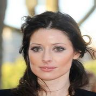

In [ ]:
imge_v[3450]

In [ ]:
imge_val = []
for i in imge_v:
  imge_val.append(i/225)

### **Splitting The Data**

In [ ]:
X_train =np.array(imge_t)
X_test  =np.array(imge_val)
Y_train =np.array(data_t)
Y_test  =np.array(data_v)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(9656, 96, 96, 3)
(9656,)
(3470, 96, 96, 3)
(3470,)


### **Defining model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add

In [ ]:
model = models.Sequential()

# Add convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96,96, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the convolutional layers
model.add(layers.Flatten())

# Add fully connected layers
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # for binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 47, 47, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0

### **Defining Checkpoint**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("bald_or_NOT_model.h5", save_best_only=True)
early_stopping = callbacks.EarlyStopping(monitor='val_loss',patience=75,restore_best_weights=True )


### **Fitting the model**

In [ ]:
history = model.fit(
    X_train,Y_train,
    validation_data=(X_test,Y_test),
    epochs=3,
    callbacks=[checkpoint, early_stopping],
)

302/302 [==============================] - 120s 399ms/step - loss: 0.1449 - accuracy: 0.9449 - val_loss: 0.1198 - val_accuracy: 0.9519


### **Evaluating the model**

In [ ]:
model.evaluate(X_test,Y_test)

109/109 [==============================] - 12s 107ms/step - loss: 0.1198 - accuracy: 0.9519


[0.1198120042681694, 0.9518731832504272]

### **Make prediction using model**

In [ ]:
pred = model.predict(X_test)

109/109 [==============================] - 14s 119ms/step


In [ ]:
i=0
Pred_l=[]
while(i<len(pred)):
  Pred_l.append(int(np.round(pred[i])))
  i=i+1

<ipython-input-30-efaf433d1ce0>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[i])))


### **Confusion matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
report=classification_report(Y_test, Pred_l)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3000
           1       0.75      0.96      0.84       470

    accuracy                           0.95      3470
   macro avg       0.87      0.96      0.91      3470
weighted avg       0.96      0.95      0.95      3470



### **Testing model**

In [ ]:
def test_image(ind, imge,imge_t, Model):
  plt.imshow(imge[ind])
  image_test=imge_t[ind]
  pred_l=Model.predict(np.array([image_test]))
  b_n=['Not BLAD','BLAD']
  output=int(np.round(pred_l))
  print("Predicted  is "+ b_n[output])

1/1 [==============================] - 0s 23ms/step
Predicted  is BLAD


<ipython-input-33-e7f25bd67aee>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output=int(np.round(pred_l))


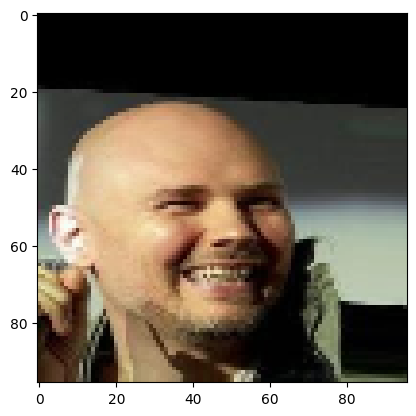

In [ ]:
test_image(100,imge,imge_t,model)

1/1 [==============================] - 0s 19ms/step
Predicted  is BLAD


<ipython-input-33-e7f25bd67aee>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output=int(np.round(pred_l))


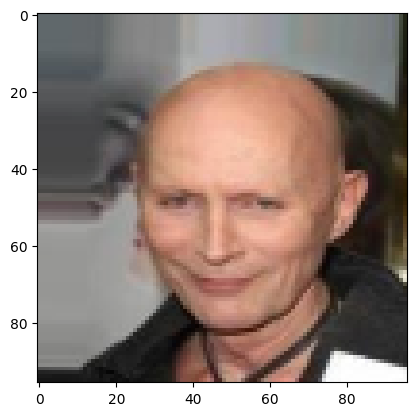

In [ ]:
test_image(670,imge,imge_t,model)

1/1 [==============================] - 0s 31ms/step
Predicted  is BLAD


<ipython-input-33-e7f25bd67aee>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output=int(np.round(pred_l))


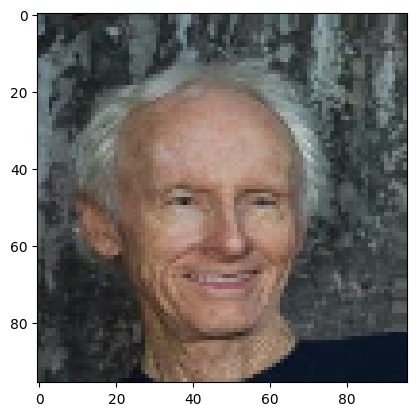

In [ ]:
test_image(500,imge,imge_t,model)

1/1 [==============================] - 0s 22ms/step
Predicted  is BLAD


<ipython-input-33-e7f25bd67aee>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output=int(np.round(pred_l))


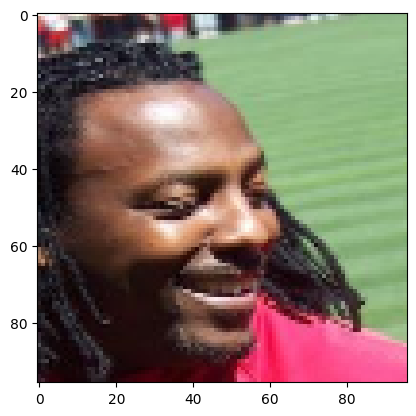

In [ ]:
test_image(10,imge,imge_t,model)

1/1 [==============================] - 0s 19ms/step
Predicted  is Not BLAD


<ipython-input-33-e7f25bd67aee>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output=int(np.round(pred_l))


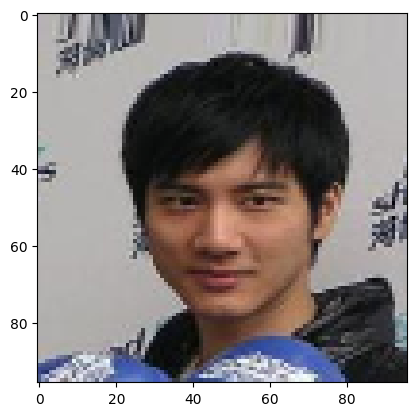

In [ ]:
test_image(6999,imge,imge_t,model)

1/1 [==============================] - 0s 20ms/step
Predicted  is Not BLAD


<ipython-input-33-e7f25bd67aee>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output=int(np.round(pred_l))


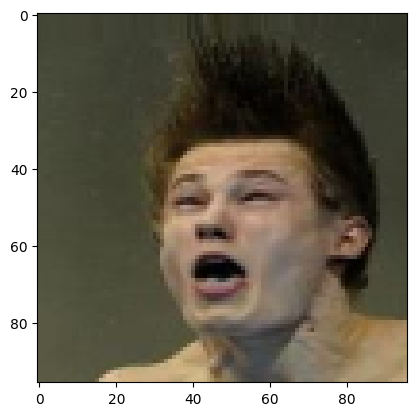

In [ ]:
test_image(7000,imge,imge_t,model)

1/1 [==============================] - 0s 19ms/step
Predicted  is Not BLAD


<ipython-input-33-e7f25bd67aee>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  output=int(np.round(pred_l))


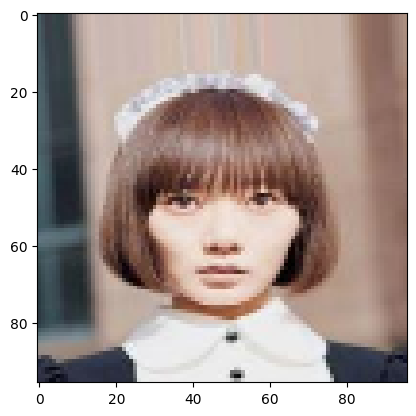

In [ ]:
test_image(7047,imge,imge_t,model)